In [16]:
import math
import random
import matplotlib.pyplot as plt
from random import shuffle

In [17]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

In [18]:
def gradm(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)*d[i][0]
  return -1*sum/len(d)

In [19]:
def gradc(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)
  return -1*sum/len(d)

In [20]:
number_of_samples = 6
learning_rate = 0.1
epochs = 100
batch_size = 2
m = -1
c = 1

v_m = 0
v_c = 0
momentum_coeff = 0.9
number_of_batches = number_of_samples//batch_size

In [21]:
x = [0.2,0.4,0.6,0.8,1.0,1.2]
y = [3.4,3.8,4.2,4.6,5.0,5.4]

data = list()

for i in range(6):
  data.append((x[i],y[i]))

print(data)

[(0.2, 3.4), (0.4, 3.8), (0.6, 4.2), (0.8, 4.6), (1.0, 5.0), (1.2, 5.4)]


In [22]:
error_list = []
for i in range(epochs):
  for j in range(number_of_batches):
    if j == number_of_batches:
      d = data[j*batch_size:]
    else:
      d = data[j*batch_size:(j+1)*batch_size]
    deltam = -1*learning_rate*gradm(d,m,c)
    deltac = -1*learning_rate*gradc(d,m,c)

    v_m = v_m*momentum_coeff + deltam
    v_c = v_c*momentum_coeff + deltac

    m = m + v_m
    c = c + v_c
    
    error_list.append(error(d,m,c))
  random.shuffle(data)

Text(0.5, 1.0, 'error graph in case of Mini Batch GD')

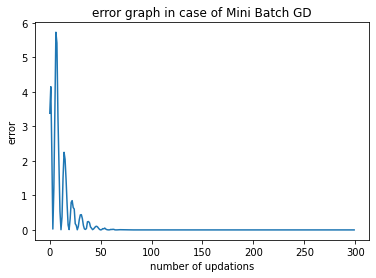

In [24]:
x1 = range(epochs*(number_of_batches))
y1 = error_list

plt.plot(x1,y1)
plt.xlabel("number of updations")
plt.ylabel("error")
plt.title("error graph in case of Mini Batch GD")

Text(0.5, 1.0, 'line which is generated after training')

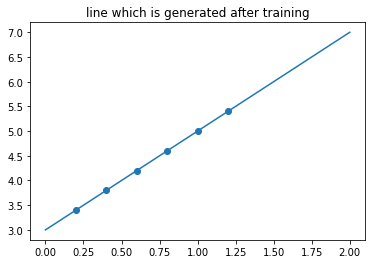

In [25]:
x2 = range(0,3)
y2 = [m*i+c for i in x2]

plt.plot(x2,y2)
plt.scatter(x,y)
plt.title("line which is generated after training")

In [26]:
print("optimal value of m, c :",m,c)

optimal value of m, c : 2.000000040392388 2.9999997915910606
